In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [28]:
pr=pd.read_csv('shh6.csv')
pr

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [29]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#  Read the dataset and visualize it.# 

In [33]:
is_repeated_guest,lead_time = make_moons(n_samples=10000, noise=.5, random_state=0)
# Step2: Split the training test set
is_repeated_guest_train, is_repeated_guest_test, lead_time_train, lead_time_test = train_test_split(is_repeated_guest, lead_time, test_size=0.2, random_state=42)
# Visualize the dataset
import pandas as pd
pd.DataFrame(is_repeated_guest).head()

,0,1
0,2.149477,-0.412594
1,1.192794,0.424816
2,-0.255470,1.520489
3,0.143992,-0.219085
4,-0.033275,1.259550


In [51]:
is_canceled,booking_changes = make_moons(n_samples=10000, noise=.5, random_state=0)
# Step2: Split the training test set
is_canceled_train, is_canceled_test, booking_changes_train, booking_changes_test = train_test_split(is_canceled, booking_changes, test_size=0.2, random_state=42)
# Visualize the dataset
import pandas as pd
pd.DataFrame(is_canceled).head()

,0,1
0,2.149477,-0.412594
1,1.192794,0.424816
2,-0.255470,1.520489
3,0.143992,-0.219085
4,-0.033275,1.259550


In [34]:
email, adr = make_moons(n_samples=10000, noise=.5, random_state=0)
# Step2: Split the training test set
email_train, email_test, adr_train,adr_test = train_test_split(email, adr, test_size=0.2, random_state=42)
# Visualize the dataset
import pandas as pd
pd.DataFrame(email).head()

,0,1
0,2.149477,-0.412594
1,1.192794,0.424816
2,-0.255470,1.520489
3,0.143992,-0.219085
4,-0.033275,1.259550


# Creating simple DecisionTreeClassifier and predict the class of sample.


In [35]:
from sklearn import tree
email ,adr
clf = tree.DecisionTreeClassifier()
clf = clf.fit(email, adr)
clf.predict([[2., 2.]])

array([1], dtype=int32)

In [37]:
from sklearn import tree
email = [[0, 0], [2, 2]]
adr = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(email, adr)
clf.predict([[1, 1]])

array([0.5])

#  Plot the tree using plot-tree function

In [38]:
from sklearn import tree

[Text(167.4, 163.07999999999998, 'X[0] <= 1.0\nmse = 1.0\nsamples = 2\nvalue = 1.5'),
 Text(83.7, 54.360000000000014, 'mse = 0.0\nsamples = 1\nvalue = 0.5'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 0.0\nsamples = 1\nvalue = 2.5')]

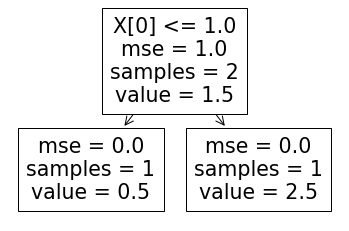

In [39]:
tree.plot_tree(clf)

# Read the dataset and visualize it. 

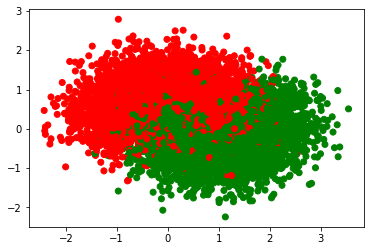

In [52]:
# Data Sample 1
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
colors = ['red', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(is_canceled[:,0], is_canceled[:,1], c=vectorizer(booking_changes))

# Data Sample 2
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
plt.scatter(features[:,0], features[:,1], c=vectorizer(true_labels))

In [53]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [54]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Reading the Iris.csv file
data = load_iris()
# Extracting Attributes / Features
is_canceled = data.data
# Extracting Target / Class Labels
booking_changes = data.target
# View file attributes
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [56]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state
=0)
clf.fit(is_canceled_train, booking_changes_train)
booking_changes_pred = clf.predict(is_canceled_test)
accuracy_score(booking_changes_test, booking_changes_pred)

0.7965

In [ ]:
from matplotlib import cm
plt.figure()
pr.plot(colormap=cm.cubehelix)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

D:\.metadata\anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='booking_changes', ylabel='is_canceled'>

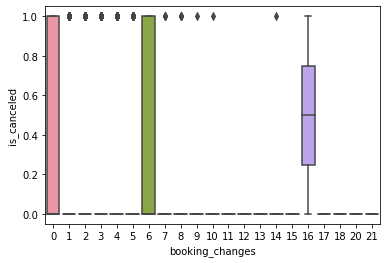

In [65]:
sns.boxplot(pr['booking_changes'],pr['is_canceled'])